In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import os
import sklearn as sk
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
%matplotlib inline

In [12]:
ds, ds_info = tfds.load('imdb_reviews', as_supervised=True, with_info=True)

In [34]:
model = keras.models.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2",
                           input_shape=[], output_shape=[50], dtype=tf.string),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.Adam(lr=1e-3),
             metrics=['accuracy'])

In [35]:
batch_size = 32

train_size = ds_info.splits['train'].num_examples
valid_size = 1000
test_size = ds_info.splits['test'].num_examples

train_ds = ds['train'].repeat().batch(batch_size).prefetch(1)
valid_ds = ds['test'].take(valid_size).repeat().batch(batch_size).prefetch(1)
test_ds = ds['test'].skip(valid_size)
s


history = model.fit(train_ds, 
                     steps_per_epoch=train_size // batch_size,
                     validation_data=valid_ds,
                     validation_steps=valid_size // batch_size,
                     epochs=2)

Train for 781 steps, validate for 31 steps
Epoch 1/5
781/781 [==============================] - 16s 20ms/step - loss: 0.5318 - accuracy: 0.7349 - val_loss: 0.5551 - val_accuracy: 0.7177
Epoch 2/5
781/781 [==============================] - 17s 22ms/step - loss: 0.5081 - accuracy: 0.7505 - val_loss: 0.5527 - val_accuracy: 0.7298
Epoch 3/5
781/781 [==============================] - 17s 22ms/step - loss: 0.5009 - accuracy: 0.7559 - val_loss: 0.5492 - val_accuracy: 0.7359
Epoch 4/5
781/781 [==============================] - 17s 21ms/step - loss: 0.4940 - accuracy: 0.7592 - val_loss: 0.5523 - val_accuracy: 0.7399
Epoch 5/5
781/781 [==============================] - 15s 19ms/step - loss: 0.4867 - accuracy: 0.7646 - val_loss: 0.5635 - val_accuracy: 0.7258


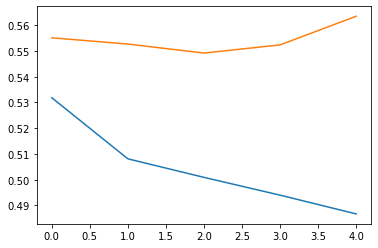

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()